In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import _tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
X_train = pd.read_pickle('./data/Race_x_train.pkl')
y_train = pd.read_pickle('./data/Race_y_train_so.pkl')
X_test = pd.read_pickle('./data/Race_x_test.pkl')
y_test = pd.read_pickle('./data/Race_y_test_so.pkl')

In [3]:
model= RandomForestClassifier(random_state = 100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

# Measure edge importance

In [4]:
# NxN-es feature mátrixot tölti fel
def fill_mx(matrix, feature_list, test_list):
    l = len(test_list)
    for i in range(l-1):
        for j in range(i+1,l):
            x = feature_list.index(test_list[i])
            y = feature_list.index(test_list[j])
            if (x==y): continue
            matrix[min(x,y)][max(x,y)] += 1

In [5]:
def recurse(node, list):
    if tree_.feature[node] != _tree.TREE_UNDEFINED:
        list.append(feature_name[node])
        recurse(tree_.children_left[node], list)
        recurse(tree_.children_right[node], list)
        del list[-1]
    else:
        fill_mx(matrix, feature_names, list)
                
feature_names = X_train.columns.values.tolist()
feature_list = []
matrix = np.array(np.zeros((len(feature_names),len(feature_names))))

#start recurse
for tree in model.estimators_:
    tree_ = tree.tree_
    feature_name = [
            feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
            for i in tree_.feature
        ]
    recurse(0, feature_list)

print(matrix.shape)
print(matrix)

# normalize
#matrix_n = matrix/(np.max(matrix))
#print('\nnormalized:\n',matrix_n)

(128, 128)
[[  0. 149. 298. ... 176. 933. 260.]
 [  0.   0. 128. ...  75. 652. 133.]
 [  0.   0.   0. ... 193. 698. 205.]
 ...
 [  0.   0.   0. ...   0. 758. 139.]
 [  0.   0.   0. ...   0.   0. 713.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [6]:
df = pd.DataFrame(matrix, index=feature_names, columns=feature_names)
pairs = df.stack().sort_values(ascending=False)
pairs[0:20]

f81  f86     11351.0
f83  f86     11068.0
f50  f86     11029.0
     f58     10105.0
f86  f108    10038.0
f50  f81      9983.0
f58  f83      9788.0
f55  f81      9223.0
f58  f81      8986.0
f37  f83      8861.0
f50  f83      8858.0
f55  f58      8843.0
f37  f81      8792.0
f58  f86      8788.0
f48  f81      8748.0
f37  f50      8719.0
f81  f108     8704.0
f86  f98      8682.0
f55  f108     8536.0
     f86      8444.0
dtype: float64

In [7]:
# sum edge weights for each node

n = 128
top = np.zeros(n)

for i in range(n):
    sum = np.sum(np.hstack((matrix[0:i,i] , matrix[i,i:n])))
    top[i] = sum

In [8]:
order = np.sort(top)[::-1]
order_i = np.argsort(top)[::-1]

for v, i in zip(order,order_i):
    print("f{} \t {}".format(i+1,v))

f86 	 382875.0
f50 	 364970.0
f81 	 364223.0
f83 	 341990.0
f58 	 332875.0
f37 	 314468.0
f55 	 311697.0
f108 	 287278.0
f48 	 281231.0
f20 	 245506.0
f110 	 241215.0
f98 	 227679.0
f127 	 219021.0
f49 	 213105.0
f89 	 213026.0
f71 	 200501.0
f69 	 199130.0
f78 	 191285.0
f13 	 188095.0
f90 	 179198.0
f113 	 173210.0
f7 	 168218.0
f119 	 165283.0
f68 	 154268.0
f42 	 143791.0
f124 	 140077.0
f82 	 139354.0
f11 	 136844.0
f46 	 136230.0
f123 	 133540.0
f54 	 126224.0
f97 	 125712.0
f79 	 122929.0
f112 	 118001.0
f5 	 117089.0
f38 	 115203.0
f73 	 114423.0
f33 	 111894.0
f107 	 111599.0
f19 	 110886.0
f92 	 110773.0
f65 	 109464.0
f22 	 107199.0
f88 	 106087.0
f28 	 101812.0
f36 	 101757.0
f62 	 100003.0
f35 	 97497.0
f61 	 95078.0
f85 	 93232.0
f26 	 92279.0
f102 	 92092.0
f64 	 91861.0
f51 	 91584.0
f96 	 88580.0
f66 	 87846.0
f118 	 87587.0
f93 	 86071.0
f94 	 85250.0
f84 	 84674.0
f16 	 79726.0
f106 	 78922.0
f14 	 78643.0
f60 	 73705.0
f52 	 71558.0
f101 	 70638.0
f10 	 70601.0
f39 

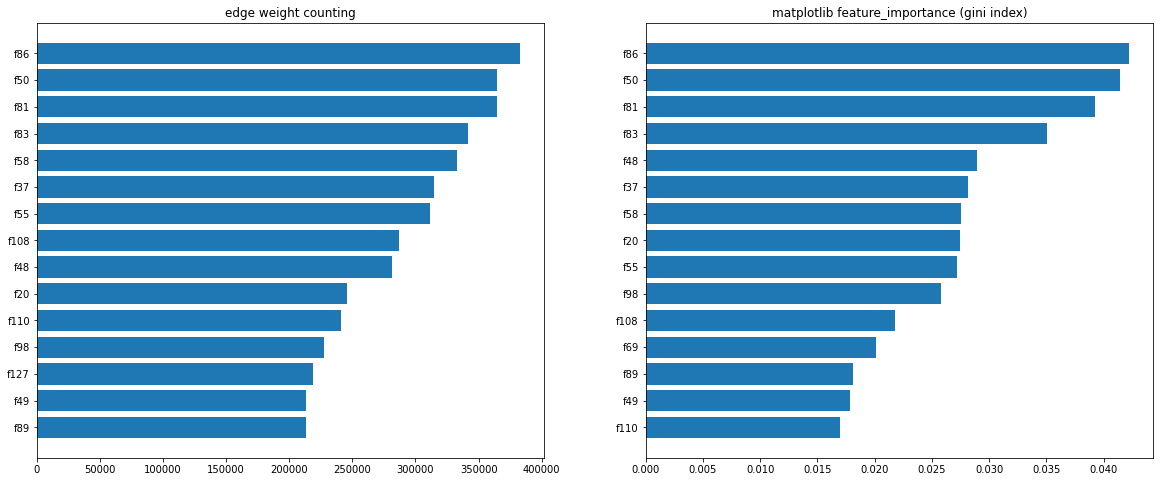

In [9]:
import matplotlib.pyplot as plt 

# edge counting
strings = []
for i in order_i[0:15]:
    strings.append("f{}".format(str(i+1)))

# sklearn gini
ms_imp_df = pd.DataFrame({'feature': X_train.columns.values,
                       'importance': model.feature_importances_})
 
# Reorder by importance
ms_ordered_df = ms_imp_df.sort_values(by='importance', ascending=False)
data = ms_ordered_df.head(n=15)

# plot
plt.figure(figsize=(20,8))

plt.subplot(121)
plt.barh(strings,order[0:15])
plt.title("edge weight counting")
plt.gca().invert_yaxis()

plt.subplot(122)
plt.title("matplotlib feature_importance (gini index)")
plt.barh(data["feature"],data["importance"])
plt.gca().invert_yaxis()

# Remove top x features 

In [10]:
# original model with 128 features
accuracy_score(y_test, model.predict(X_test))

0.9035424669227486

In [11]:
results = []
for n in range(0,101,5):
    print("removing: {} features".format(n))
    strings = []
    for i in order_i[0:n]:
        strings.append("f{}".format(str(i+1)))

    # remove features
    X_train_drop = X_train.drop(columns=strings)
    X_test_drop = X_test.drop(columns=strings)

    # retrain model
    model_drop= RandomForestClassifier(random_state = 100)
    model_drop.fit(X_train_drop, y_train)

    # new model accuracy score
    results.append((n,accuracy_score(y_test, model_drop.predict(X_test_drop))))

removing: 0 features
removing: 5 features
removing: 10 features
removing: 15 features
removing: 20 features
removing: 25 features
removing: 30 features
removing: 35 features
removing: 40 features
removing: 45 features
removing: 50 features
removing: 55 features
removing: 60 features
removing: 65 features
removing: 70 features
removing: 75 features
removing: 80 features
removing: 85 features
removing: 90 features
removing: 95 features
removing: 100 features


In [12]:
res = [[ i for i, j in results ],
       [ j for i, j in results ]]

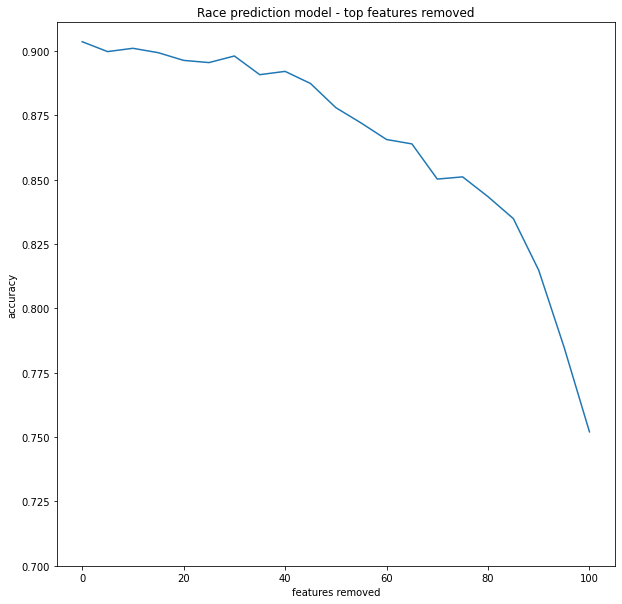

In [14]:
plt.figure(figsize=(10,10))
plt.plot(res[0], res[1])
plt.ylim(0.7)
plt.title("Race prediction model - top features removed")
plt.ylabel("accuracy")
plt.xlabel("features removed")
plt.show()